## Волкова Татьяна ПИ19-2 КР Обработка данных для машинного обучения

#### Цель работы
Выполнить дескриптивный анализ данных для подготовки к машинному обучению


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### 1.	На сайте https://www.kaggle.com/datasets выбрать набор данных каждому студенту индивидуально. Лучше всего выбирать датасеты в предметной области исходя из личных предпочтений. Не стоит выбирать слишком большие наборы данных (лучше не более 100 Мб).

Был выбран датасет Give me some credit:
https://www.kaggle.com/datasets/brycecf/give-me-some-credit-dataset

In [2]:
df = pd.read_csv("cs-training.csv", index_col = 'Unnamed: 0')
df.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


### 2.	В начале анализа следует привести общую характеристику набора данных: количество наблюдений, признаков, предметная область, содержание признаков, характер целевой переменной, задача обучения (регрессия, классификация, количество классов).

In [3]:
print("Количество наблюдений ->> ", df.shape[0], "\nКоличество признаков ->> ", df.shape[1])

Количество наблюдений ->>  150000 
Количество признаков ->>  11


Предметная область - банки, кредиты
Датасет содержит данные о платежеспособных и неплатежеспособных клиентах. Используется для предсказния решений о выдаче кредитов



Содержание признаков:

- RevolvingUtilizationOfUnsecuredLines - Общий баланс по кредитным картам и личным кредитным линиям, за исключением недвижимости и отсутствия задолженности по рассрочке платежа

- Age – возраст

- NumberOfTime30-59DaysPastDueNotWorse - Количество случаев, когда заемщик допускал просрочку в 30-59 дней, но не хуже за последние 2 года

- DebtRation - Ежемесячные выплаты по долгам, алименты, расходы на проживание

- MonthlyIncome – Ежемесячный доход

- NumberOfOpenCreditLinesAndLoans - Количество открытых кредитов (например, рассрочка, автокредит или ипотека) и кредитных линий (например, кредитные карты)

- NumberOfTimes90DaysLate - Количество случаев, когда заемщик просрочил платеж на 90 дней и более

- NumberRealEstateLoansOrLines - Количество ипотечных кредитов и кредитов на недвижимость, включая кредитные линии на покупку жилья

- NumberOfTime60-89DaysPastDueNotWorse - Количество случаев, когда заемщик допускал просрочку на 60-89 дней, но не хуже за последние 2 года

- NumberOfDependents - Количество иждивенцев в семье, не считая себя (супруг, дети и тд)

Целевая переменная ->> SeriousDlqin2yrs (ее и будем предсказывать)

Принимает значения 1 или 0 - соответственно платежеспособный/неплатежеспособный клиент

In [4]:
df["SeriousDlqin2yrs"].unique()

array([1, 0], dtype=int64)

Задача обучения - задача бинарной классификации

In [5]:
# типы переменных
df.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

### 3.	Провести в Jupyter средствами pandas, sklearn, seaborn описательный анализ выбранного набора включающего (но не ограниченного) следующие шаги:

#### a.	исследование шкалы измерения каждого существенного признака;

In [6]:
# описательная статистика для всех числовых признаков (пока еще не решила какие из них существенны)
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


#### b. построение эмпирического распределения каждого существенного признака;

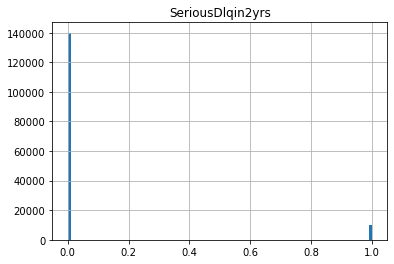

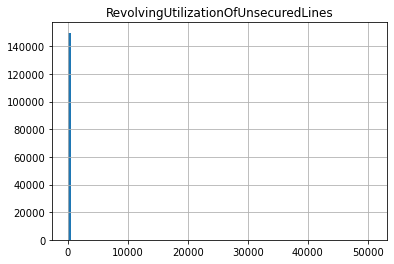

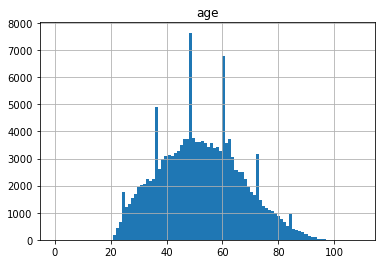

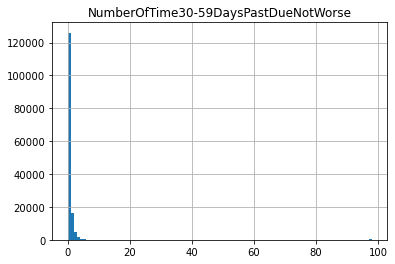

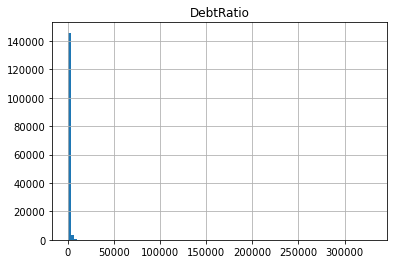

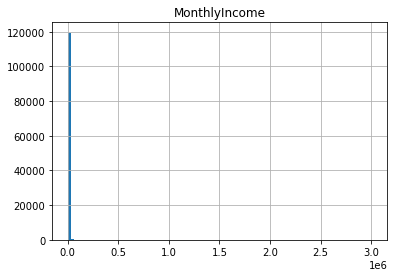

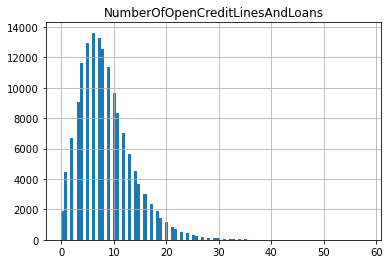

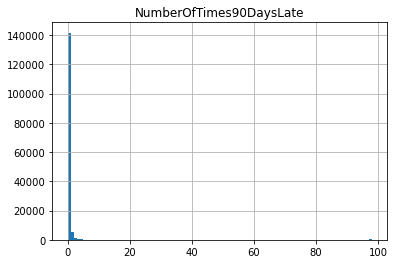

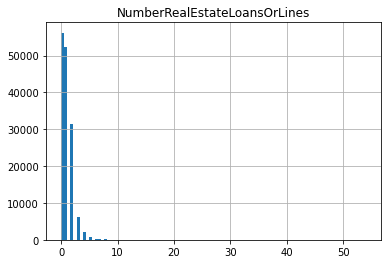

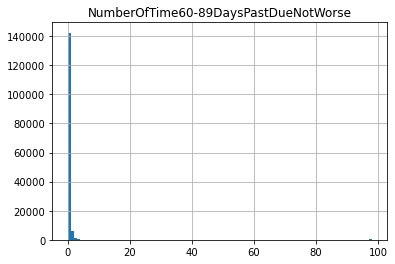

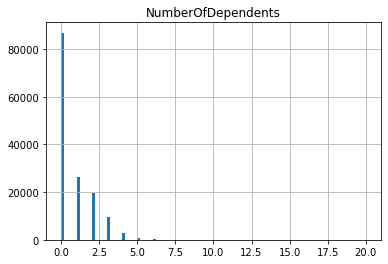

In [34]:
for col in df.columns:
    df[col].hist(bins=100)
    plt.title(col)
    plt.show()

Age и NumberOfOpenCreditLinesAndLoans - нормальное распределение
NumberOfDependents и NumberRealEstateLoansOrLines тоже похоже

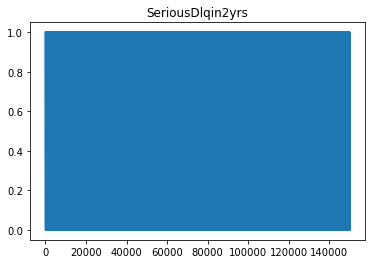

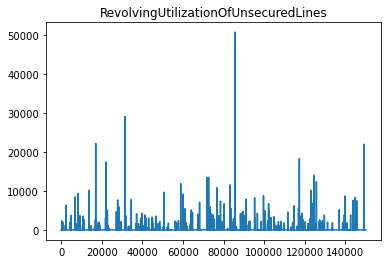

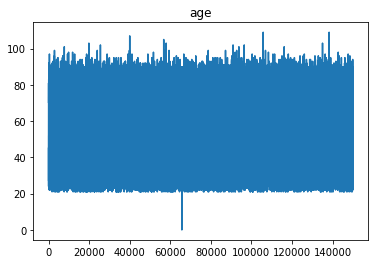

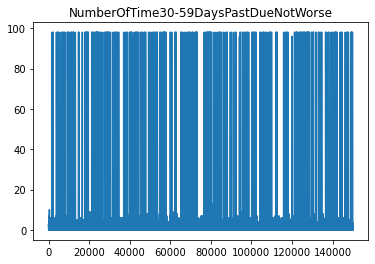

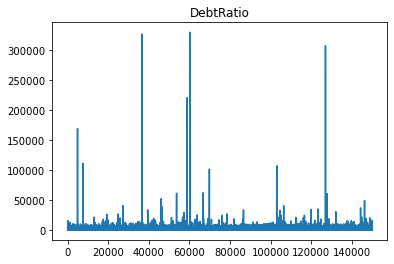

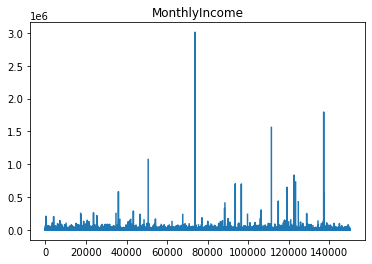

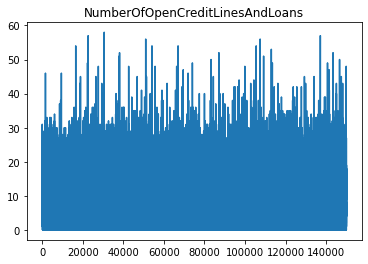

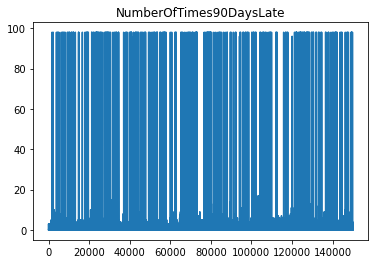

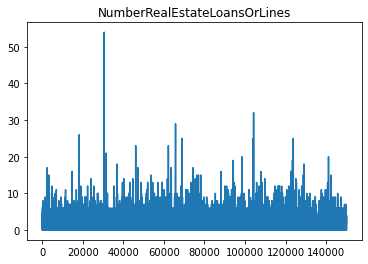

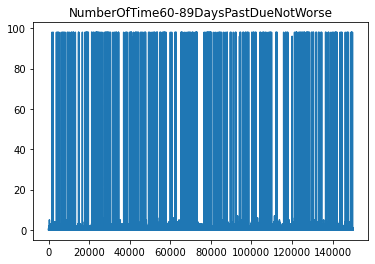

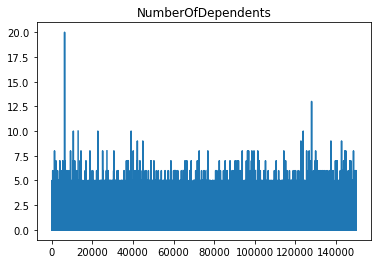

In [8]:
for col in df.columns:
    df[col].plot()
    plt.title(col)
    plt.show()

#### c. анализ количества и распределения отсутствующих значений;

In [9]:
# пустые значения
df.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [10]:
df['MonthlyIncome'].isna().sum()/df.shape[0]*100

19.820666666666668

In [11]:
df['NumberOfDependents'].isna().sum()/df.shape[0]*100

2.616

Пустые значения наблюдаются в столбцах с ежемесячным доходом (19% пропусков) и количеством человек в семье (2%)

#### d. построение совместного распределения каждого признака и целевой переменной;

не уверена что это

In [12]:
pd.DataFrame(df.groupby(['SeriousDlqin2yrs']).count())

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,,,,,,,,,,
0,139974,139974,139974,139974,111912,139974,139974,139974,139974,136229
1,10026,10026,10026,10026,8357,10026,10026,10026,10026,9847


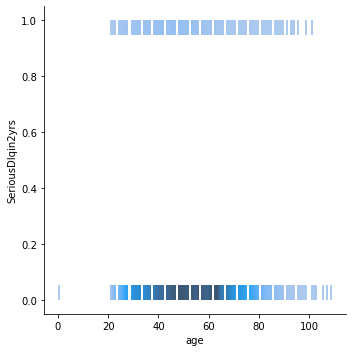

In [13]:
# на примере нескольких признаков
sns.displot(x="age",
            y="SeriousDlqin2yrs",
            data=df)
plt.show()

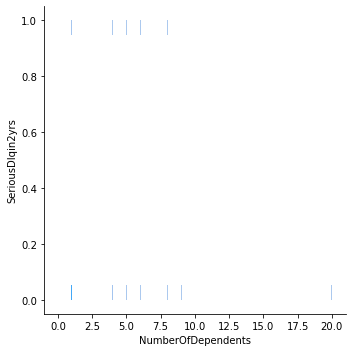

In [17]:
sns.displot(x="NumberOfDependents",
            y="SeriousDlqin2yrs",
            data=df)
plt.show()

#### e. построение корреляционной матрицы.

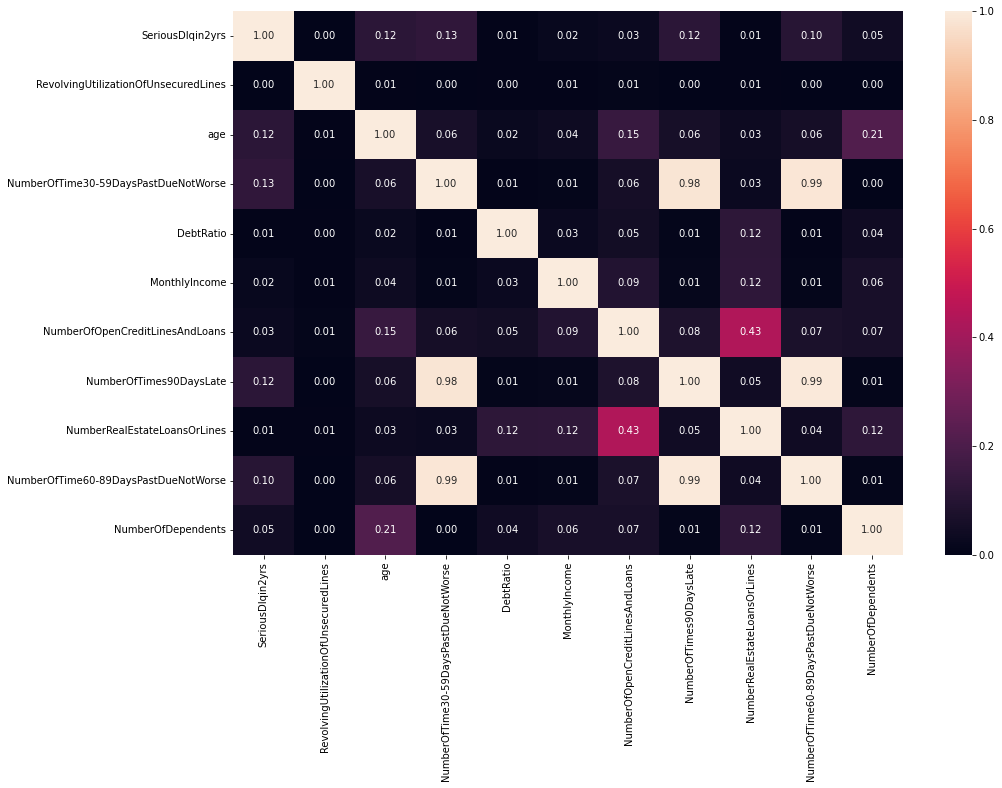

In [32]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr().abs(), vmin=0, vmax=1, annot=True, fmt=".2f");

Все признаки не особо коррелируют с целевой переменной, некоторые сильно коррелируют между собой (Например столбцы с задолжностями на разные сроки)

### 4.	По каждому пункту анализа необходимо сделать содержательный вывод.

Подвыводы в предыдущих пунктах

### 5.	Провести подготовительную обработку данных, включающую следующие шаги:

    c.	удаление несущественных либо избыточных признаков;

    d.	другие необходимые действия в зависимости от набора данных и задачи (группировка, удаление аномалий, и др.).


#### a.    удаление или заполнение отсутствующих значений;

Как мне кажется, ежемесячный доход и количество членов заполнить невозможно. 
Медианное, среднее или рандомное может отрицательно повлиять на дальнейшее предсказние.
К тому же пропусков достаточно много, особенно в столбце ежемесячного дохода
Поэтому я удалю пропуски.

In [36]:
df.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [38]:
df = df.dropna(subset=["MonthlyIncome", "NumberOfDependents"])
df.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

#### b.    приведение всех признаков к бинарной либо числовой шкале;

Все признаки и так являются числовыми

In [39]:
df.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

 #### c.	удаление несущественных либо избыточных признаков;
 
 Судя по корреляционной матрице сложно судить какие из признаков незначительны, поэтому пока оставим все

#### d.	другие необходимые действия в зависимости от набора данных и задачи (группировка, удаление аномалий, и др.).

Для нахождения аномальных значений построим ящики с усами

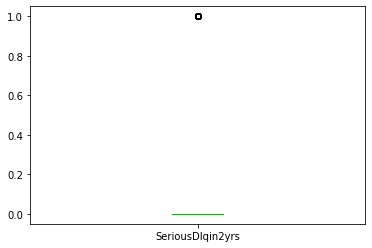

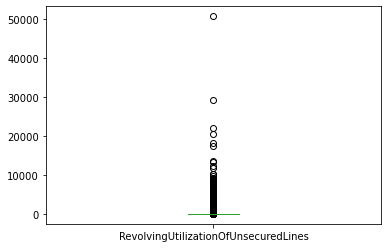

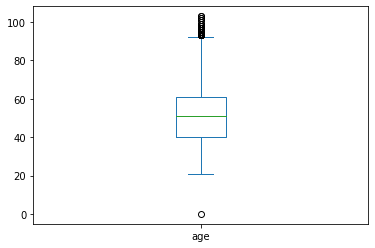

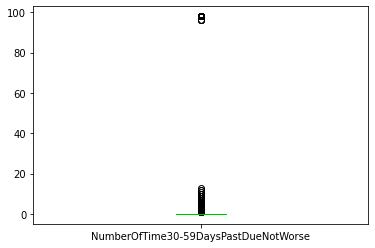

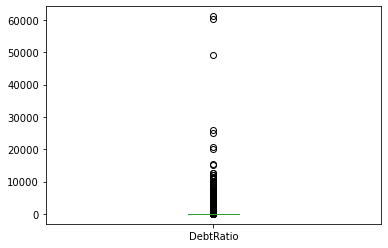

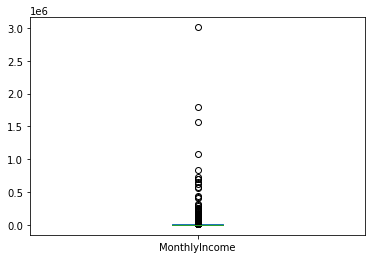

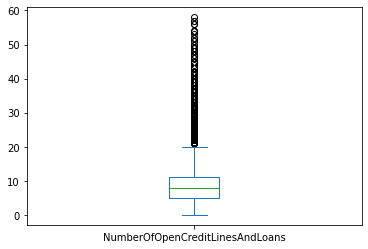

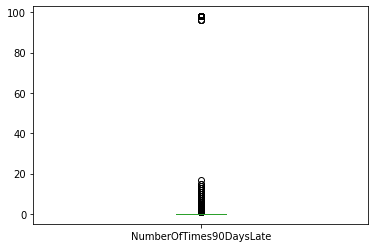

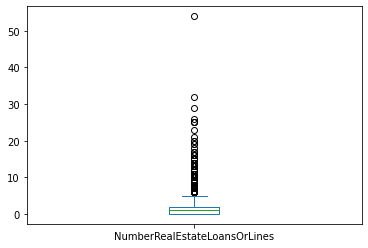

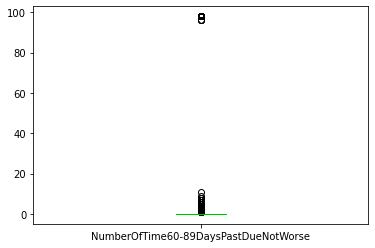

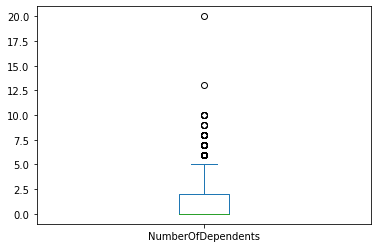

In [43]:
for col in df.columns:
    df[col].plot.box()
    plt.show()

### 6.	Количественные характеристики датасета необходимо также привести после его обработки.

In [40]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000,1.202690e+05,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000
mean,0.069486,5.899873,51.289792,0.381769,26.598777,6.670221e+03,8.758475,0.211925,1.054519,0.187829,0.851832
std,0.254280,257.040685,14.426684,3.499234,424.446457,1.438467e+04,5.172835,3.465276,1.149273,3.447901,1.148391
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.035084,40.000000,0.000000,0.143388,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.177282,51.000000,0.000000,0.296023,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.579428,61.000000,0.000000,0.482559,8.249000e+03,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,50708.000000,103.000000,98.000000,61106.500000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000
